In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

LOADING THE DATASET

In [3]:
%cd /content/drive/MyDrive/Tech Titans/Virtusa Jatayu/Sentimentanalysis
!ls

/content/drive/MyDrive/Tech Titans/Virtusa Jatayu/Sentimentanalysis
'Sentimental analysis project.ipynb'   train.csv


In [4]:
df = pd.read_csv(r'train.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
 # datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           31962 non-null  int64 
 1   label        31962 non-null  int64 
 2   tweet        31962 non-null  object
 3   clean_tweet  31962 non-null  object
dtypes: int64(2), object(2)
memory usage: 998.9+ KB


PREPROCESSING THE DATASET

In [5]:
# remove pattern in the input text
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern, input_txt) #output as a list
    for word in r:
        input_txt = re.sub(word,"",input_txt) #pattern replace string
    return input_txt    

In [6]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
#remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [8]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:
#remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ") #DOUBT
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [10]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [15]:
#individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())


#Emoji analysis
pip install advertools
import advertools as adv
emoji_summary = extract_emoji(tokenized_tweet)
tokenized_tweet.head()

SyntaxError: ignored

In [ ]:
#stem the words
from nltk.stem.porter import PorterStemmer #NLTK Natural Language Toolkit
stemmer = PorterStemmer()
#porterstemmeralgorithm..stemming algorithm
#alternative best snowball stemmer 
#truncating methods, statistical methods, and mixed methods
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [ ]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = "".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,whenfatherdysfunctselfishdragkidintodysfunct#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank#lyftcreditcaustheyofferwheelchairvan#dis...
2,3,0,bihday your majesty,bihdayyourmajesti
3,4,0,#model i love u take with u all the time in ...,#modellovetakewithtime
4,5,0,factsguide: society now #motivation,factsguidsocieti#motiv


In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


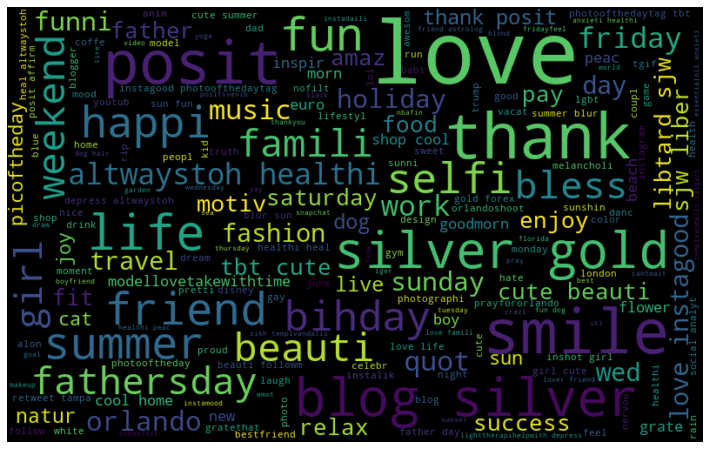

In [ ]:
# visualize the frequent words
all_words = "".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

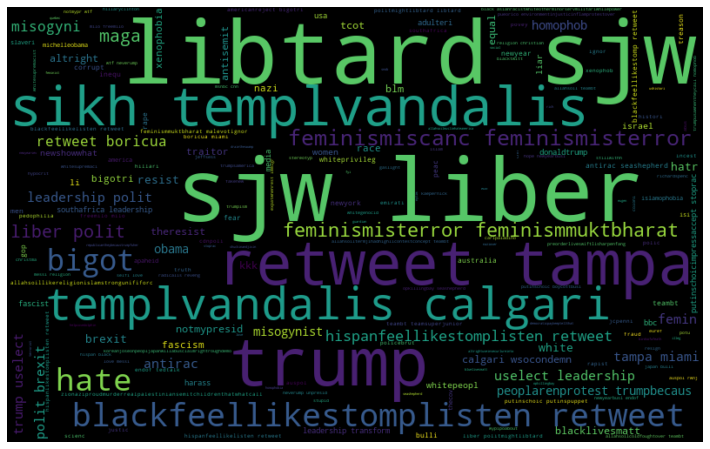

In [ ]:
#frequent words visualization for -ve

all_words = "".join([sentence for sentence in df['clean_tweet'][df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# extraction the hastag
def hastag_extract(tweets):
    hastags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)",tweet)
        hastags.append(ht)
    return hastags #return as list

In [ ]:
# extract hastags from non-racist/sexist tweets
ht_positive = hastag_extract(df['clean_tweet'][df['label']==0])

# extract hastags from racist/sexist tweets
ht_negative = hastag_extract(df['clean_tweet'][df['label']==1])

In [ ]:
ht_positive[:5]

[['run'],
 ['lyftcreditcaustheyofferwheelchairvan', 'disapoint', 'getthank'],
 [],
 ['modellovetakewithtime'],
 ['motiv']]

In [ ]:
#unnest list
#GOOD
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [ ]:
ht_positive[:5]

['run',
 'lyftcreditcaustheyofferwheelchairvan',
 'disapoint',
 'getthank',
 'modellovetakewithtime']

In [ ]:
freq = nltk.FreqDist(ht_positive)  #returns a dictionary
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,63
1,lyftcreditcaustheyofferwheelchairvan,1
2,disapoint,1
3,getthank,2
4,modellovetakewithtime,325


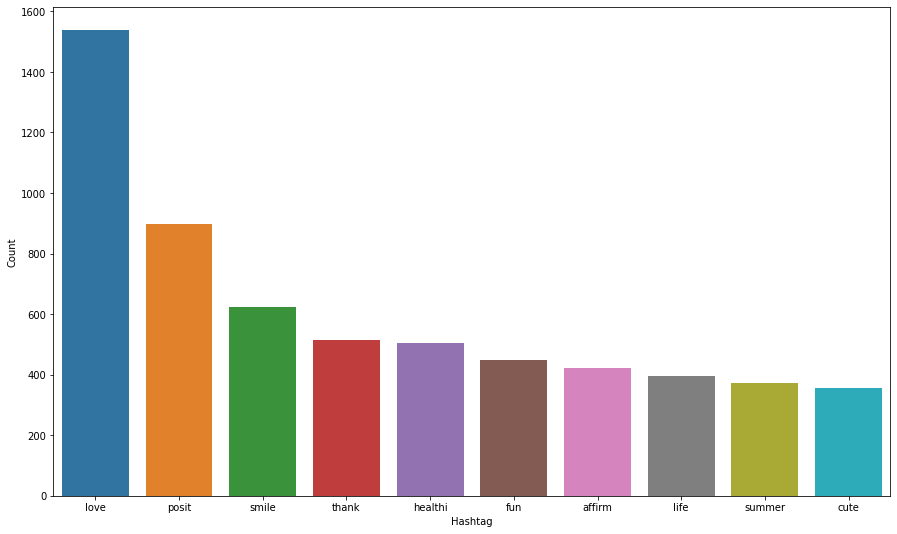

In [ ]:
# select top 10 hastags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

INPUT SPLIT

In [ ]:
# feature extraction

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [ ]:
#bow[0].toarray()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'],random_state=42, test_size=0.25)


MODEL TRAINING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [ ]:
# training 
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# testing 
pred = model.predict(x_test)
f1_score(y_test, pred)

0.3847241867043848

In [ ]:
accuracy_score(y_test,pred)

0.9455637592291328

In [ ]:
# use probability to get output 
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test,pred)

0.4468085106382979

In [ ]:
accuracy_score(y_test,pred)

0.9479414341133775

In [ ]:
pred_prob[0]

array([0.92087145, 0.07912855])

In [ ]:
pred_prob[0][1] >= 0.3

False

THANK YOU